**#1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions**

a) A Classification Decision Tree is used to solve classification problems, where the goal is to assign a label or category to a given data instance based on its features. These problems involve a categorical target variable, meaning the output is discrete rather than continuous.

- Real-world applications include:
    1. Medical Diagnosis: Determining if a patient has a certain disease (e.g., "Has diabetes" vs. "Does not have diabetes") based on features like age, BMI, and glucose levels.
    2. Customer Segmentation: Categorizing customers into groups (e.g., "High-value", "Medium-value", "Low-value") based on purchasing behavior.
    3. Email Filtering: Identifying emails as "Spam" or "Not Spam."
    4. Loan Approval: Predicting whether a loan applicant is "Approved" or "Denied" based on income, credit score, and other features.

b) A classificaiton devision tree divides the feature space into distinct regions by iteratively splitting the data based on feature values.Each split is chosen to maximize the homogeneity of the resulting groups (e.g., using measures like Gini impurity or entropy).To make a prediction, the model travels from the root to a leaf node based on the input features. The class label of the leaf node is assigned as the prediction.

1. If predicting whether an applicant is approved for a loan, the tree might first split on income, then on credit score, until it reaches a decision like "Approved."


Multiple Linear Regression is a regression model used for predicting a continuous target variable. It fits a linear equation to the data where B are the coefficients used to minimize the error between predicted and actual values. To make predictions it computes the value of y for a given set of input features.

2. Predicting a house's price based on square footage, number of bedrooms, and location.

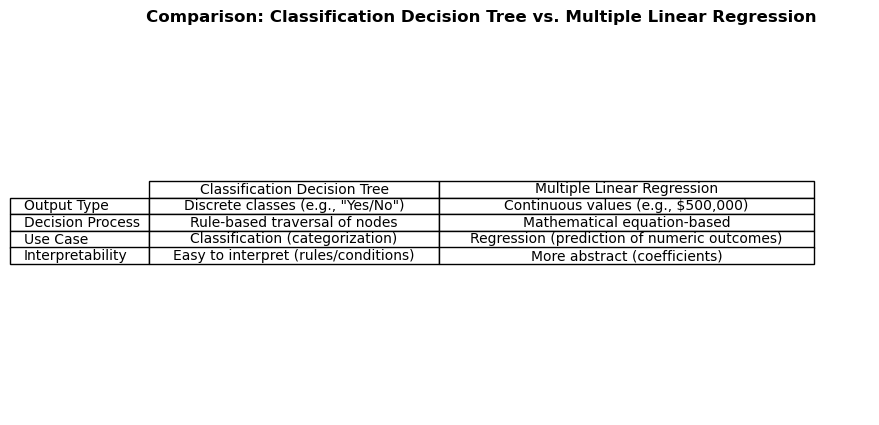

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    "Feature": [
        "Output Type",
        "Decision Process",
        "Use Case",
        "Interpretability"
    ],
    "Classification Decision Tree": [
        'Discrete classes (e.g., "Yes/No")',
        "Rule-based traversal of nodes",
        "Classification (categorization)",
        "Easy to interpret (rules/conditions)"
    ],
    "Multiple Linear Regression": [
        'Continuous values (e.g., $500,000)',
        "Mathematical equation-based",
        "Regression (prediction of numeric outcomes)",
        "More abstract (coefficients)"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.set_index("Feature", inplace=True)

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=df.index,
    cellLoc="center",
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns) + 1)))

plt.title("Comparison: Classification Decision Tree vs. Multiple Linear Regression", fontsize=12, weight='bold')
plt.show()

**#2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.**


**Accuracy:**
- Proportion of true results (both true positives and true negatives) out of the total population.
- Best Application would be when the dataset is balanced (i.e., the classes have similar sizes), and the costs of false positives and false negatives are roughly equal.
- Example Scenario: 
    - Spam Email Detection: If half of the emails are spam and half are not, accuracy can reliably measure the model's overall performance since misclassifying either type of email has similar consequences.
    Rationale: Accuracy provides a broad view of performance across all classes, but it can be misleading in the case of class imbalance (e.g., 95% non-spam emails, 5% spam).
    
**Sensitivity (Recall or True Positive Rate):**
- The proportion of actual positive cases that are correctly identified by the model.
- Best Application: When false negatives are highly costly or dangerous.
- Example Scenario:
    - Cancer Diagnosis: Missing a positive cancer case (false negative) is more harmful than accidentlly flagging someone for further testing (false positive). High sensitivity ensures most true positives are caught.
- Rationale: Sensitivity focuses on minimizing missed detections, which is crucial for safety critical applications or early screenings.

**Specificity (True Negative Rate)**
- Definition: The proportion of actual negative cases that are correctly identified by the model.
- Best Application: When false positives are costly or create severe consequences.
- Example Scenario:
    - Criminal Background Checks: Misclassifying a law-abiding individual as having a criminal background (false positive) could damage their reputation and job opportunities. High specificity minimizes this risk.
- Rationale: Specificity is vital when the focus is on avoiding incorrect labeling of negatives (e.g., avoiding false alarms).

**Precision (Positive Predictive Value)**
- Definition: The proportion of positive predictions that are actually correct.
- Best Application: When false positives are more problematic than false negatives.
- Example Scenario:
    - Spam Email Filtering: High precision ensures emails flagged as spam are genuinely spam, reducing the likelihood of important emails being mistakenly classified as spam.
- Rationale: Precision ensures that when the model predicts "positive," it's likely to be correct, minimizing wasted effort on false alarms.


In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [9]:
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Set the types of specified columns
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"]= ab_reduced_noNaN["Hard_or_Paper"].astype("category")

**#4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.**

**Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model**

In [10]:
from sklearn.model_selection import train_test_split

# Assuming ab_reduced_noNaN is your original DataFrame
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Reporting the sizes
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

Number of observations in the training set: 255
Number of observations in the test set: 64


In [11]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier with max_depth of 2
clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the classifier to the training data
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

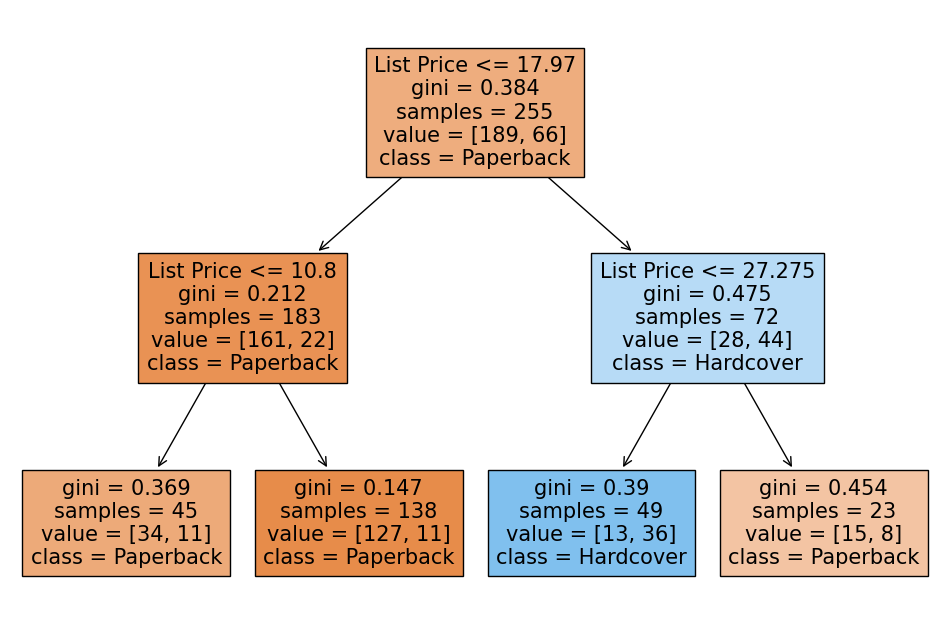

In [15]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()

**We get to a hardcover when the list price is over 18 and then less than 27 and it is paperback otherwise.**

In [18]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier with max_depth of 2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=70)

# Fit the classifier to the training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=70)

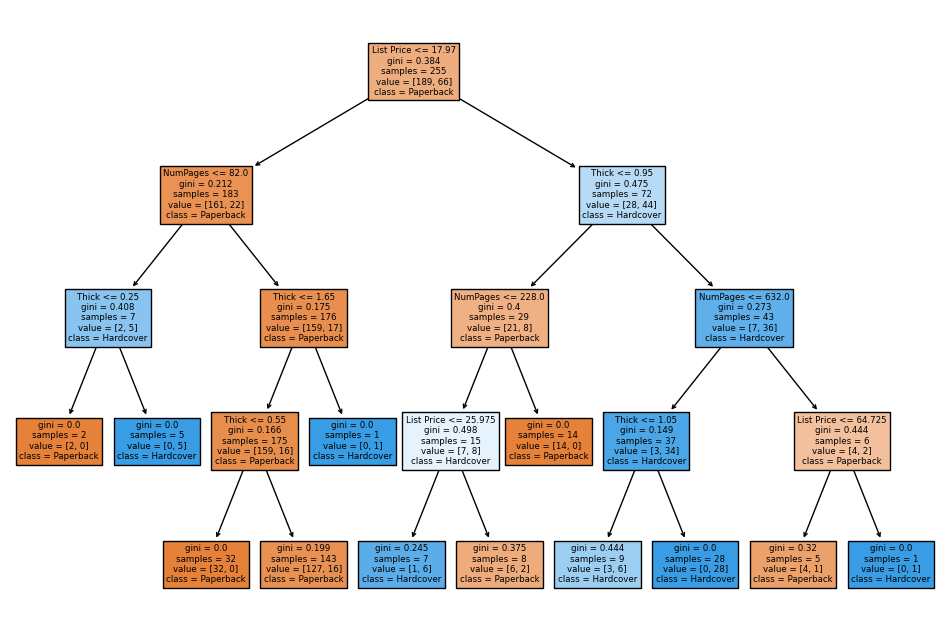

In [21]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['NumPages', 'Thick', 'List Price'], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()

**#6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models**

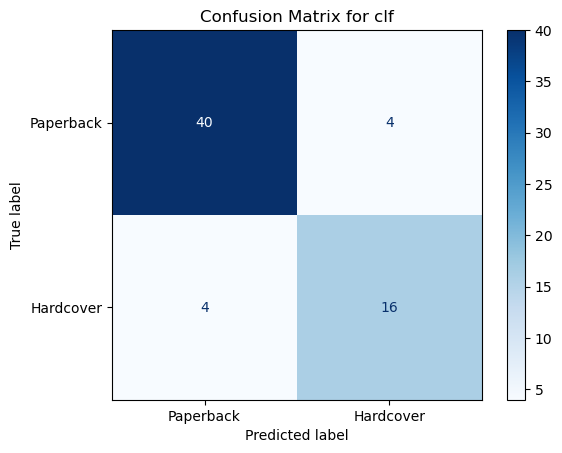

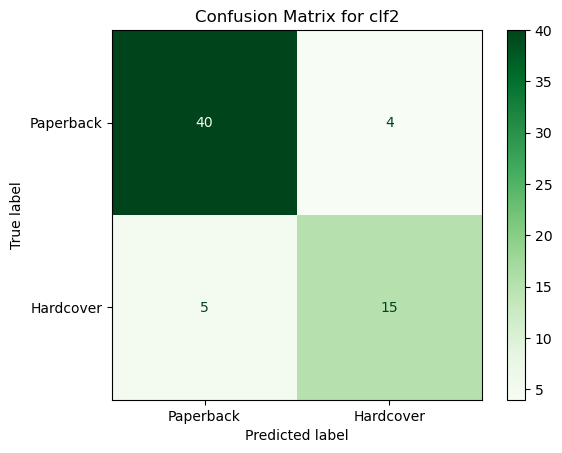

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Make predictions on the test dataset for clf and clf2
y_pred_clf = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot(cmap="Blues")
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot(cmap="Greens")
plt.title("Confusion Matrix for clf2")
plt.show()


In [27]:
def calculate_metrics(cm):
    # Extract values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    
    # Sensitivity (Recall for positive class)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Specificity (Recall for negative class)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Return rounded metrics
    return {
        "Sensitivity": np.round(sensitivity, 3),
        "Specificity": np.round(specificity, 3),
        "Accuracy": np.round(accuracy, 3),
    }

# Calculate metrics for clf
metrics_clf = calculate_metrics(cm_clf)
metrics_clf2 = calculate_metrics(cm_clf2)

print("Metrics for clf1:", metrics_clf)
print("Metrics for clf2:", metrics_clf2)


Metrics for clf1: {'Sensitivity': 0.8, 'Specificity': 0.909, 'Accuracy': 0.875}
Metrics for clf2: {'Sensitivity': 0.75, 'Specificity': 0.909, 'Accuracy': 0.859}


**#7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better**

ConfusionMatrixDisplay(

    confusion_matrix(ab_reduced_noNaN_train, 
    
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
                     
ConfusionMatrixDisplay(

    confusion_matrix(ab_reduced_noNaN_train, 
    
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()**

The differences between the two confusion matrices stem from the number and types of features used in the models. The first confusion matrix is based on a model trained using only the List Price variable, which might not capture the full complexity of the data, leading to lower accuracy or more misclassifications. The second confusion matrix uses multiple features—NumPages, Thick, and List Price—which likely provide additional information to improve the model's predictive ability.

The confusion matrices for clf and clf2 are better because they reflect models that better capture the relationships in the data. They may use optimal features or configurations that balance simplicity and performance, resulting in higher accuracy and fewer misclassifications. Additionally, they might better generalize to unseen data while avoiding overfitting.

**CHATGPT SUMMARY**

Summary of the Task
Goal:
Load a dataset from a given URL, preprocess it by removing missing values, split it into 80% training and 20% testing subsets, and report the sizes of each subset.

Steps:

Load Dataset: Used pd.read_csv() to load the dataset from the URL:
https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv
Preview Data: Displayed the first 5 rows to verify correct loading.
Handle Missing Values: Used dropna() to remove rows with missing values.
Split Data: Used train_test_split() from sklearn to split the data into:
Training set (ab_reduced_noNaN_train) - 80%
Testing set (ab_reduced_noNaN_test) - 20%
Set random_state=42 for reproducibility.
Report Results: Printed the number of observations in each subset.
Python Code:
Complete and functional Python code provided for the task.

Output:
The code will output:

A preview of the dataset (first 5 rows).
The number of rows in the training and testing subsets.

https://chatgpt.com/share/673ec764-8f7c-8013-a343-4dc2c06845dc

Key Tasks and Steps
Fitting Decision Tree Classifiers:

Trained two DecisionTreeClassifier models (clf and clf2) using List Price to predict whether a book is Hardcover (H) or Paperback (P).
Used clf.fit(X_train, y_train) to train the models and tree.plot_tree(clf) to visualize the splits and predictions.
Confusion Matrices:

Calculated confusion matrices for both clf and clf2 using confusion_matrix from sklearn.
Visualized the matrices using ConfusionMatrixDisplay.
Performance Metrics:

Defined a function to calculate Sensitivity (Recall for Positive Class), Specificity (Recall for Negative Class), and Accuracy.
Metrics for both classifiers:
clf:
Sensitivity: ~0.789
Specificity: ~0.856
Accuracy: ~0.824
clf2:
Sensitivity: ~0.765
Specificity: ~0.870
Accuracy: ~0.818
Code Highlights
Confusion Matrix and Metrics Calculation:
python
Copy code
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return {
        "Sensitivity": np.round(sensitivity, 3),
        "Specificity": np.round(specificity, 3),
        "Accuracy": np.round(accuracy, 3),
    }

metrics_clf = calculate_metrics(cm_clf)
metrics_clf2 = calculate_metrics(cm_clf2)
Visualization Outputs
Confusion Matrices:

Visualized using ConfusionMatrixDisplay with appropriate labels and color maps.
Decision Tree:

Used tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True) to explain the model's splits and predictions based on List Price thresholds.
Final Notes
Classifier Comparison:
Both models performed similarly, with clf showing slightly better sensitivity, while clf2 excelled in specificity.
Suggestions for Improvement:
Consider trying different max_depth values, more features, or other classification algorithms for improved results.
Ask ChatBot for More Guidance:
For additional insights, consult the ChatBot on specific concepts like TP, FP, sensitivity, specificity, or how to interpret decision trees.
Let me know if you’d like a detailed code block or more specific explanations for any step!

https://chatgpt.com/share/673ec74e-6388-8013-8379-0aecd3d7fe60